# Supplement Sales Prediction
Your Client WOMart is a leading nutrition and supplement retail chain that offers a comprehensive range of products for all your wellness and fitness needs. 

WOMart follows a multi-channel distribution strategy with 350+ retail stores spread across 100+ cities. 

Effective forecasting for store sales gives essential insight into upcoming cash flow, meaning WOMart can more accurately plan the cashflow at the store level.

Sales data for 18 months from 365 stores of WOMart is available along with information on Store Type, Location Type for each store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday etc.

Your task is to predict the store sales for each store in the test set for the next two months.



# Imports

In [1]:
# EDA and general imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Forecasting
from fbprophet import Prophet

# Read Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Datasets/Hackathon/TRAIN.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Data Science/Datasets/Hackathon/TEST_FINAL.csv')
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


# EDA

In [23]:
print('Unique Region', df['Region_Code'].unique())
print('Unique Location Types', df['Location_Type'].unique())
print('Unique Store Types', df['Store_Type'].unique())
print('Unique Stores', df['Store_id'].unique().shape)

Unique Region ['R1' 'R4' 'R2' 'R3']
Unique Location Types ['L3' 'L2' 'L1' 'L5' 'L4']
Unique Store Types ['S1' 'S4' 'S3' 'S2']
Unique Stores (365,)


In [24]:
df_test

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No
...,...,...,...,...,...,...,...,...
22260,T1210601,186,S2,L5,R2,2019-07-31,0,No
22261,T1210602,11,S4,L2,R1,2019-07-31,0,No
22262,T1210603,185,S1,L1,R3,2019-07-31,0,Yes
22263,T1210604,69,S1,L1,R4,2019-07-31,0,No


In [25]:
# Nuber of stores in testset
df_test['Store_id'].unique().shape

(365,)

In [26]:
# holidays
dayoff = np.array(df.loc[(df['Store_id']==1) & (df['Holiday']==1)]['Date']) 
dayoff

array(['2018-01-01', '2018-01-14', '2018-01-22', '2018-01-26',
       '2018-01-31', '2018-02-10', '2018-02-14', '2018-02-19',
       '2018-03-01', '2018-03-02', '2018-03-18', '2018-03-25',
       '2018-03-29', '2018-03-30', '2018-04-01', '2018-04-14',
       '2018-04-15', '2018-04-30', '2018-05-09', '2018-06-15',
       '2018-06-16', '2018-07-14', '2018-08-15', '2018-08-17',
       '2018-08-22', '2018-08-25', '2018-08-26', '2018-09-03',
       '2018-09-13', '2018-09-21', '2018-10-02', '2018-10-16',
       '2018-10-17', '2018-10-18', '2018-10-19', '2018-10-24',
       '2018-10-27', '2018-11-06', '2018-11-07', '2018-11-08',
       '2018-11-09', '2018-11-13', '2018-11-21', '2018-11-23',
       '2018-11-24', '2018-12-24', '2018-12-25', '2019-01-01',
       '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-26',
       '2019-02-10', '2019-02-19', '2019-03-01', '2019-03-04',
       '2019-03-20', '2019-03-21', '2019-04-06', '2019-04-13',
       '2019-04-14', '2019-04-15', '2019-04-17', '2019-

In [27]:
stores = list(range(1,366)) # List of store_ids

# Check that holidays are same for all stores or not
for store in stores:
  store_dayoff = np.array(df.loc[(df['Store_id']==store) & (df['Holiday']==1)]['Date'])
  print(store_dayoff==dayoff)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True

In [28]:
# Holidays are same for all stores.
dayoff

array(['2018-01-01', '2018-01-14', '2018-01-22', '2018-01-26',
       '2018-01-31', '2018-02-10', '2018-02-14', '2018-02-19',
       '2018-03-01', '2018-03-02', '2018-03-18', '2018-03-25',
       '2018-03-29', '2018-03-30', '2018-04-01', '2018-04-14',
       '2018-04-15', '2018-04-30', '2018-05-09', '2018-06-15',
       '2018-06-16', '2018-07-14', '2018-08-15', '2018-08-17',
       '2018-08-22', '2018-08-25', '2018-08-26', '2018-09-03',
       '2018-09-13', '2018-09-21', '2018-10-02', '2018-10-16',
       '2018-10-17', '2018-10-18', '2018-10-19', '2018-10-24',
       '2018-10-27', '2018-11-06', '2018-11-07', '2018-11-08',
       '2018-11-09', '2018-11-13', '2018-11-21', '2018-11-23',
       '2018-11-24', '2018-12-24', '2018-12-25', '2019-01-01',
       '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-26',
       '2019-02-10', '2019-02-19', '2019-03-01', '2019-03-04',
       '2019-03-20', '2019-03-21', '2019-04-06', '2019-04-13',
       '2019-04-14', '2019-04-15', '2019-04-17', '2019-

In [29]:
# Holidays in test data period
test_dayoff = np.array(df_test.loc[(df_test['Store_id']==1) & (df_test['Holiday']==1)]['Date']) 
test_dayoff

array(['2019-06-05', '2019-07-04'], dtype=object)

In [30]:
# Check that holidays are same for all stores or not in test data period.
for store in stores:
  test_store_dayoff = np.array(df_test.loc[(df_test['Store_id']==store) & (df_test['Holiday']==1)]['Date'])
  print(test_store_dayoff==test_dayoff)

[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True

In [31]:
# Holidays for train and test data for each store are same. 

# Store_id 1 Forecast

In [32]:
df1 = df.loc[df['Store_id']==1].copy()
df1

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
607,T1000608,1,S1,L3,R1,2018-01-02,0,Yes,60,42369.00
1046,T1001047,1,S1,L3,R1,2018-01-03,0,Yes,72,50037.00
1207,T1001208,1,S1,L3,R1,2018-01-04,0,Yes,64,44397.00
1752,T1001753,1,S1,L3,R1,2018-01-05,0,Yes,63,47604.00
...,...,...,...,...,...,...,...,...,...,...
186569,T1186570,1,S1,L3,R1,2019-05-27,0,Yes,53,33075.00
187165,T1187166,1,S1,L3,R1,2019-05-28,0,Yes,57,37317.00
187391,T1187392,1,S1,L3,R1,2019-05-29,0,Yes,69,44652.00
187962,T1187963,1,S1,L3,R1,2019-05-30,0,Yes,66,42387.00


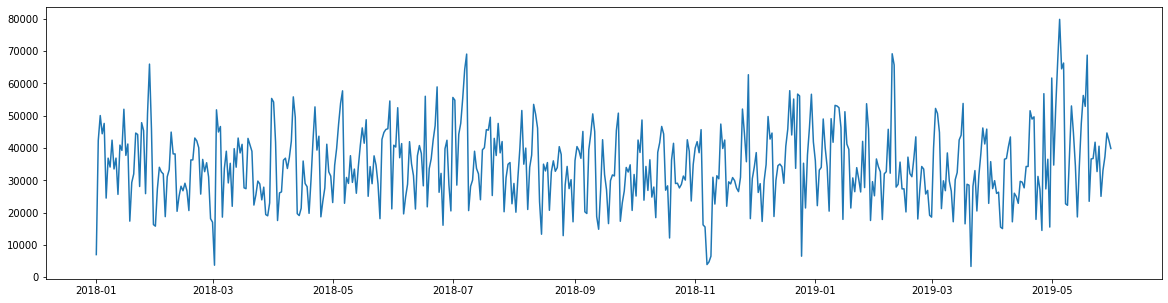

In [33]:
plt.figure(figsize=(20,5))
plt.plot(pd.to_datetime(df1['Date']), df1['Sales'])

# Final Model
Forecast for every store sepret model in facebook prophet with holiday configurations. 

## Forecast for store 1

In [34]:
df1f = df1[['Date', 'Sales']].copy()
df1f.rename(columns={'Date':'ds', 'Sales':'y'}, inplace=True)
df1f

,ds,y
0,2018-01-01,7011.84
607,2018-01-02,42369.00
1046,2018-01-03,50037.00
1207,2018-01-04,44397.00
1752,2018-01-05,47604.00
...,...,...
186569,2019-05-27,33075.00
187165,2019-05-28,37317.00
187391,2019-05-29,44652.00
187962,2019-05-30,42387.00


In [37]:
store_holidays = pd.DataFrame({
  'holiday': 'dayoff',
  'ds': pd.to_datetime(['2018-01-01', '2018-01-14', '2018-01-22', '2018-01-26',
       '2018-01-31', '2018-02-10', '2018-02-14', '2018-02-19',
       '2018-03-01', '2018-03-02', '2018-03-18', '2018-03-25',
       '2018-03-29', '2018-03-30', '2018-04-01', '2018-04-14',
       '2018-04-15', '2018-04-30', '2018-05-09', '2018-06-15',
       '2018-06-16', '2018-07-14', '2018-08-15', '2018-08-17',
       '2018-08-22', '2018-08-25', '2018-08-26', '2018-09-03',
       '2018-09-13', '2018-09-21', '2018-10-02', '2018-10-16',
       '2018-10-17', '2018-10-18', '2018-10-19', '2018-10-24',
       '2018-10-27', '2018-11-06', '2018-11-07', '2018-11-08',
       '2018-11-09', '2018-11-13', '2018-11-21', '2018-11-23',
       '2018-11-24', '2018-12-24', '2018-12-25', '2019-01-01',
       '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-26',
       '2019-02-10', '2019-02-19', '2019-03-01', '2019-03-04',
       '2019-03-20', '2019-03-21', '2019-04-06', '2019-04-13',
       '2019-04-14', '2019-04-15', '2019-04-17', '2019-04-19',
       '2019-04-21', '2019-05-09', '2019-05-18', '2019-05-31',
       '2019-06-05', '2019-07-04']),
})

In [38]:
m = Prophet(interval_width=0.95, daily_seasonality=True, holidays=store_holidays)
model = m.fit(df1f)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [39]:
future = m.make_future_dataframe(periods=61,freq='D')
forecast = m.predict(future)
forecast.tail(61)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,dayoff,dayoff_lower,dayoff_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
516,2019-06-01,14480.415609,18887.945710,62629.170515,14480.415609,14480.415609,25597.490625,25597.490625,25597.490625,22247.522102,22247.522102,22247.522102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3349.968523,3349.968523,3349.968523,0.0,0.0,0.0,40077.906233
517,2019-06-02,14484.506262,21260.736558,64043.737696,14484.499547,14484.528108,27775.169462,27775.169462,27775.169462,22247.522102,22247.522102,22247.522102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5527.647360,5527.647360,5527.647360,0.0,0.0,0.0,42259.675723
518,2019-06-03,14488.596915,15104.566524,57888.413614,14488.572616,14488.650896,22392.782138,22392.782138,22392.782138,22247.522102,22247.522102,22247.522102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.260036,145.260036,145.260036,0.0,0.0,0.0,36881.379052
519,2019-06-04,14492.687568,10875.544972,53857.838067,14492.635462,14492.776197,18467.955027,18467.955027,18467.955027,22247.522102,22247.522102,22247.522102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3779.567075,-3779.567075,-3779.567075,0.0,0.0,0.0,32960.642595
520,2019-06-05,14496.778221,5895.790728,50786.815916,14496.694843,14496.909180,14009.749048,14009.749048,14009.749048,22247.522102,22247.522102,22247.522102,-7676.168021,-7676.168021,-7676.168021,-7676.168021,-7676.168021,-7676.168021,-561.605033,-561.605033,-561.605033,0.0,0.0,0.0,28506.527269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,2019-07-27,14709.492175,18950.211368,62666.500616,14704.939078,14714.172307,25597.490625,25597.490625,25597.490625,22247.522102,22247.522102,22247.522102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3349.968523,3349.968523,3349.968523,0.0,0.0,0.0,40306.982800
573,2019-07-28,14713.582828,19821.608518,64232.899611,14708.967388,14718.353622,27775.169462,27775.169462,27775.169462,22247.522102,22247.522102,22247.522102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5527.647360,5527.647360,5527.647360,0.0,0.0,0.0,42488.752290
574,2019-07-29,14717.673481,14088.702725,58408.229189,14712.998304,14722.530378,22392.782138,22392.782138,22392.782138,22247.522102,22247.522102,22247.522102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.260036,145.260036,145.260036,0.0,0.0,0.0,37110.455619
575,2019-07-30,14721.764134,11674.740904,54913.754540,14717.026751,14726.718396,18467.955027,18467.955027,18467.955027,22247.522102,22247.522102,22247.522102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3779.567075,-3779.567075,-3779.567075,0.0,0.0,0.0,33189.719162


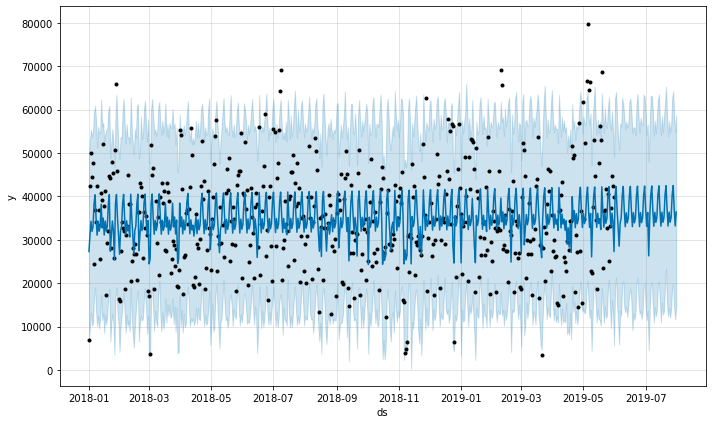

In [40]:
plot1 = m.plot(forecast)

In [41]:
df_test

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No
...,...,...,...,...,...,...,...,...
22260,T1210601,186,S2,L5,R2,2019-07-31,0,No
22261,T1210602,11,S4,L2,R1,2019-07-31,0,No
22262,T1210603,185,S1,L1,R3,2019-07-31,0,Yes
22263,T1210604,69,S1,L1,R4,2019-07-31,0,No


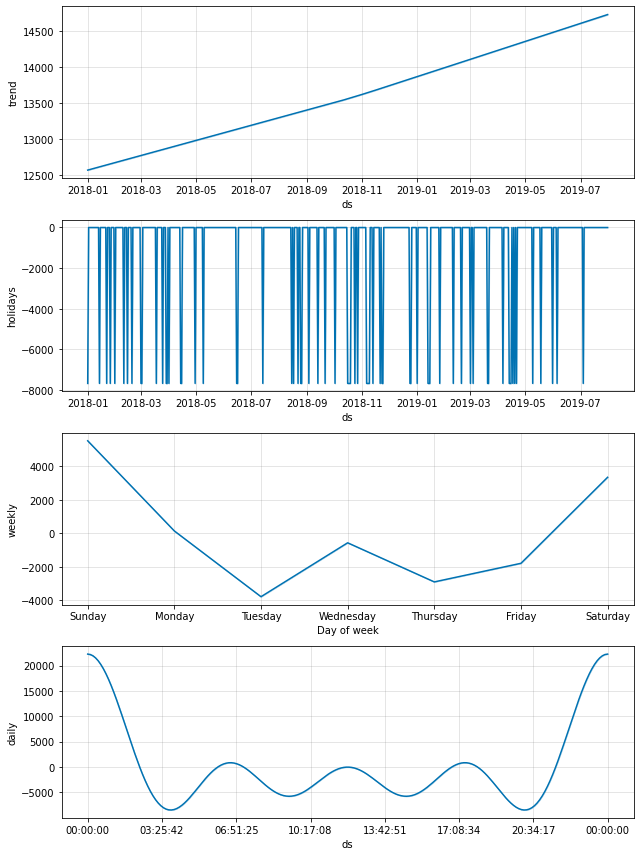

In [42]:
plt2 = m.plot_components(forecast)

## Forecast for each stores (All)

In [43]:
# function to forecast for specific store

def forecast(Store_id, periods=61, freq='D'):
  """After feeding Store_id for perticulr store, 
  it will return forecast Data Frame"""

  # Store_id for 1 store and rename columns to ds and y. 
  df_store = df.loc[df['Store_id']==Store_id][['Date', 'Sales']].copy()
  df_store.rename(columns={'Date':'ds', 'Sales':'y'}, inplace=True)

  # Forecast with Facebook Prophet, holidays added
  m = Prophet(interval_width=0.95, daily_seasonality=True, 
              holidays=store_holidays)
  model = m.fit(df_store)

  # Prediction with Facebook Prophet & return 61 period forecast.
  future = m.make_future_dataframe(periods=61,freq='D')
  forecast = m.predict(future)

  # Make seprate column for Store_id and return forecast
  forecast['Store_id'] = Store_id

  return forecast.tail(61)

In [ ]:
stores = list(range(1,366))

In [45]:
# Forecast for all stores and append predictions to single dict
ff = {}
for store in stores[:]:
  store_forecast = forecast(store).tail(61)
  ff[store] = (store_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

In [46]:
ff[1]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,dayoff,dayoff_lower,dayoff_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,Store_id
516,2019-06-01,14480.415609,19563.970933,61875.793832,14480.415609,14480.415609,25597.490625,25597.490625,25597.490625,22247.522102,22247.522102,22247.522102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3349.968523,3349.968523,3349.968523,0.0,0.0,0.0,40077.906233,1
517,2019-06-02,14484.506262,21465.955176,62929.657398,14484.503354,14484.519080,27775.169462,27775.169462,27775.169462,22247.522102,22247.522102,22247.522102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5527.647360,5527.647360,5527.647360,0.0,0.0,0.0,42259.675723,1
518,2019-06-03,14488.596915,14450.498858,58667.303551,14488.581186,14488.636058,22392.782138,22392.782138,22392.782138,22247.522102,22247.522102,22247.522102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.260036,145.260036,145.260036,0.0,0.0,0.0,36881.379052,1
519,2019-06-04,14492.687568,9853.215599,55851.412847,14492.640740,14492.772504,18467.955027,18467.955027,18467.955027,22247.522102,22247.522102,22247.522102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3779.567075,-3779.567075,-3779.567075,0.0,0.0,0.0,32960.642595,1
520,2019-06-05,14496.778221,6734.340854,49203.697328,14496.692817,14496.897170,14009.749048,14009.749048,14009.749048,22247.522102,22247.522102,22247.522102,-7676.168021,-7676.168021,-7676.168021,-7676.168021,-7676.168021,-7676.168021,-561.605033,-561.605033,-561.605033,0.0,0.0,0.0,28506.527269,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,2019-07-27,14709.492175,19137.302324,61263.568559,14705.099567,14713.852650,25597.490625,25597.490625,25597.490625,22247.522102,22247.522102,22247.522102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3349.968523,3349.968523,3349.968523,0.0,0.0,0.0,40306.982800,1
573,2019-07-28,14713.582828,21821.135249,64427.086224,14709.077631,14718.098759,27775.169462,27775.169462,27775.169462,22247.522102,22247.522102,22247.522102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5527.647360,5527.647360,5527.647360,0.0,0.0,0.0,42488.752290,1
574,2019-07-29,14717.673481,16789.730123,59329.391224,14713.054115,14722.299714,22392.782138,22392.782138,22392.782138,22247.522102,22247.522102,22247.522102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.260036,145.260036,145.260036,0.0,0.0,0.0,37110.455619,1
575,2019-07-30,14721.764134,12142.460977,55514.648869,14717.082285,14726.561305,18467.955027,18467.955027,18467.955027,22247.522102,22247.522102,22247.522102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3779.567075,-3779.567075,-3779.567075,0.0,0.0,0.0,33189.719162,1


In [55]:
# Forecast for all stores
# Concat forecast data of all stores into one data frame
stores_forecast = pd.concat(ff.values()) 
final_forecast = stores_forecast[['ds', 'Store_id', 'yhat']].copy()
final_forecast.rename(columns={'ds': 'Date'}, inplace=True)
final_forecast['Date'] = final_forecast['Date'].astype(str)
final_forecast

,Date,Store_id,yhat
516,2019-06-01,1,40077.906233
517,2019-06-02,1,42259.675723
518,2019-06-03,1,36881.379052
519,2019-06-04,1,32960.642595
520,2019-06-05,1,28506.527269
...,...,...,...
572,2019-07-27,365,40749.370251
573,2019-07-28,365,43148.201500
574,2019-07-29,365,37866.014404
575,2019-07-30,365,38150.352580


## Final Submition

In [56]:
# merge forecast dataframe with test data on store id and date
final_test_df = pd.merge(df_test, final_forecast)

In [57]:
final_test_df.rename(columns={'yhat': 'Sales'}, inplace=True)

In [58]:
final_test_df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales
0,T1188341,171,S4,L2,R3,2019-06-01,0,No,65816.313271
1,T1188342,172,S1,L1,R1,2019-06-01,0,No,43292.468140
2,T1188343,173,S4,L2,R1,2019-06-01,0,No,80734.646393
3,T1188344,174,S1,L1,R4,2019-06-01,0,No,41744.655637
4,T1188345,170,S1,L1,R2,2019-06-01,0,No,44797.320142
...,...,...,...,...,...,...,...,...,...
22260,T1210601,186,S2,L5,R2,2019-07-31,0,No,23461.957480
22261,T1210602,11,S4,L2,R1,2019-07-31,0,No,69915.733672
22262,T1210603,185,S1,L1,R3,2019-07-31,0,Yes,42112.148063
22263,T1210604,69,S1,L1,R4,2019-07-31,0,No,33077.975922


In [59]:
final_test_df[['ID', 'Sales']]

,ID,Sales
0,T1188341,65816.313271
1,T1188342,43292.468140
2,T1188343,80734.646393
3,T1188344,41744.655637
4,T1188345,44797.320142
...,...,...
22260,T1210601,23461.957480
22261,T1210602,69915.733672
22262,T1210603,42112.148063
22263,T1210604,33077.975922


In [60]:
submit_df = final_test_df[['ID', 'Sales']].copy()
submit_df

,ID,Sales
0,T1188341,65816.313271
1,T1188342,43292.468140
2,T1188343,80734.646393
3,T1188344,41744.655637
4,T1188345,44797.320142
...,...,...
22260,T1210601,23461.957480
22261,T1210602,69915.733672
22262,T1210603,42112.148063
22263,T1210604,33077.975922


In [61]:
submit_df.to_csv('submit_df2.csv', index=False)